<a href="https://colab.research.google.com/github/yogi9820/skynet-admin/blob/master/Intel_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import os 
import zipfile
from tensorflow import keras

In [0]:
os.makedirs("/tmp/Data")

In [0]:
zip_ref=zipfile.ZipFile('/content/drive/My Drive/Data/intel-image-classification.zip','r')
zip_ref.extractall("/tmp/Data")
zip_ref.close()

In [6]:
data_dir='/tmp/Data/intel-image-classification'
dir_list=os.listdir(data_dir)
print(dir_list)

['seg_pred', 'seg_train', 'seg_test']


In [7]:
train_dir=data_dir+'/seg_train/seg_train'
val_dir=data_dir+'/seg_test/seg_test'
test_dir=data_dir+'/seg_pred/seg_pred'
print(os.listdir(train_dir))

['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']


In [9]:
train_datagen=keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)
train_data_generator=train_datagen.flow_from_directory(train_dir,target_size=(299,299),batch_size=20,class_mode='categorical')
val_datagen=keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)
val_data_generator=val_datagen.flow_from_directory(val_dir,target_size=(299,299),batch_size=20,class_mode='categorical')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [11]:

base_model=keras.applications.inception_v3.InceptionV3(include_top=False,weights='imagenet')
x=base_model.output
x=keras.layers.GlobalAveragePooling2D()(x)
x=keras.layers.Dense(512,activation='relu')(x)
outp=keras.layers.Dense(6,activation='softmax')(x)

model=keras.models.Model(inputs=[base_model.input],outputs=[outp])
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [0]:
opt=keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
hist=model.fit_generator(train_data_generator,steps_per_epoch=700,epochs=10,verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
700/700 [==============================] - 260s 371ms/step - loss: 0.5928 - accuracy: 0.7983
Epoch 2/10
700/700 [==============================] - 258s 369ms/step - loss: 0.4114 - accuracy: 0.8578
Epoch 3/10
700/700 [==============================] - 258s 369ms/step - loss: 0.3478 - accuracy: 0.8798
Epoch 4/10
700/700 [==============================] - 258s 369ms/step - loss: 0.3157 - accuracy: 0.8915
Epoch 5/10
700/700 [==============================] - 258s 369ms/step - loss: 0.2976 - accuracy: 0.8977
Epoch 6/10
700/700 [==============================] - 258s 368ms/step - loss: 0.2743 - accuracy: 0.9055
Epoch 7/10
700/700 [==============================] - 258s 368ms/step - loss: 0.2522 - accuracy: 0.9105
Epoch 8/10
700/700 [==============================] - 258s 369ms/step - loss: 0.2362 - accuracy: 0.9157
Epoch 9/10
700/700 [==============================] - 258s 368ms/step - loss: 0.2048 - accur

In [0]:
model.save('/content/drive/My Drive/Data/incep_tarnsfer.h5')

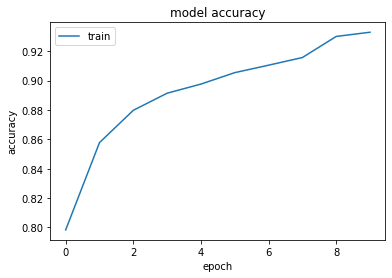

In [15]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

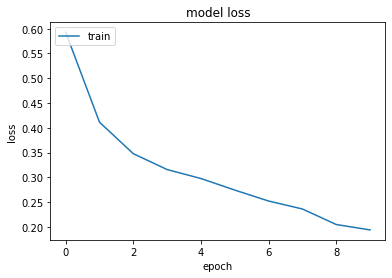

In [16]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [17]:
model.evaluate(val_data_generator,steps=600)

150/600 [======>.......................] - 16s 106ms/step - loss: 0.4401 - accuracy: 0.8363


[0.4400528073310852, 0.8363333344459534]